# <u><center>Customer Service Requests Analysis

## 1. Understand the dataset:

#### 1.1 Import the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import klib as k

#### 1.2 Visualize the dataset

In [2]:
data = pd.read_csv("./311_Service_Requests_from_2010_to_Present (1).csv",parse_dates=['Created Date','Closed Date'])


#### 1.2 Visualize the dataset

In [3]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      358057 non-null  object        
 7   Location Type                   364425 non-null  object        
 8   Incident Zip                    361560 non-null  float64       
 9   Incident Address                312859 non-null  object        
 10  Street Name                     312859 non-null  object 

#### 1.3 Print the columns of the DataFrame

In [5]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
data.rename(columns={'Unique Key':'UniqueKey', 'Created Date':'CreatedDate', 'Closed Date':'ClosedDate', 'Agency Name':'AgencyName',
       'Complaint Type':'ComplaintType','Location Type':'LocationType', 'Incident Zip':'IncidentZip',
       'Incident Address':'IncidentAddress', 'Street Name':'StreetName', 'Cross Street 1':'CrossStreet1', 'Cross Street 2':'CrossStreet2',
       'Intersection Street 1':'IntersectionStreet1', 'Intersection Street 2':'IntersectionStreet2', 'Address Type':'AddressType',
       'Facility Type':'FacilityType','Due Date':'DueDate','Resolution Description':'ResolutionDescription', 'Resolution Action Updated Date':'ResolutionActionUpdatedDate',
       'Community Board':'CommunityBoard', 'X Coordinate (State Plane)':'XCoordinate(StatePlane)',
       'Y Coordinate (State Plane)':'YCoordinate(StatePlane)', 'Park Facility Name':'ParkFacilityName', 'Park Borough':'ParkBorough',
       'School Name':'SchoolName', 'School Number':'SchoolNumber', 'School Region':'SchoolRegion', 'School Code':'SchoolCode',
       'School Phone Number':'SchoolPhoneNumber', 'School Address':'SchoolAddress', 'School City':'SchoolCity', 'School State':'SchoolState',
       'School Zip':'SchoolZip', 'School Not Found':'SchoolNotFound', 'School or Citywide Complaint':'SchoolorCitywideComplaint',
       'Vehicle Type':'VehicleType', 'Taxi Company Borough':'TaxiCompanyBorough', 'Taxi Pick Up Location':'TaxiPickUpLocation',
       'Bridge Highway Name':'BridgeHighwayName', 'Bridge Highway Direction':'BridgeHighwayDirection', 'Road Ramp':'RoadRamp',
       'Bridge Highway Segment':'BridgeHighwaySegment', 'Garage Lot Name':'GarageLotName', 'Ferry Direction':'FerryDirection',
       'Ferry Terminal Name':'FerryTerminalName'},inplace = True)

#### 1.4 Identify the shape of the dataset

In [7]:
data.shape

(364558, 53)

In [8]:
data.describe()

,UniqueKey,IncidentZip,XCoordinate(StatePlane),YCoordinate(StatePlane),SchoolorCitywideComplaint,VehicleType,TaxiCompanyBorough,TaxiPickUpLocation,GarageLotName,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


#### 1.5 Identify the variables with null values

In [9]:
data.isnull().mean()*100

UniqueKey                        0.000000
CreatedDate                      0.000000
ClosedDate                       0.653120
Agency                           0.000000
AgencyName                       0.000000
ComplaintType                    0.000000
Descriptor                       1.783255
LocationType                     0.036483
IncidentZip                      0.822366
IncidentAddress                 14.181283
StreetName                      14.181283
CrossStreet1                    15.686941
CrossStreet2                    15.856187
IntersectionStreet1             85.977540
IntersectionStreet2             86.144317
AddressType                      0.892039
City                             0.822091
Landmark                        99.897136
FacilityType                     0.655314
Status                           0.000000
DueDate                          0.000823
ResolutionDescription            0.000000
ResolutionActionUpdatedDate      0.658880
CommunityBoard                   0

## 2. Perform basic data exploratory analysis:

#### 2.1Plot to show the number of null values in each column

GridSpec(6, 6)

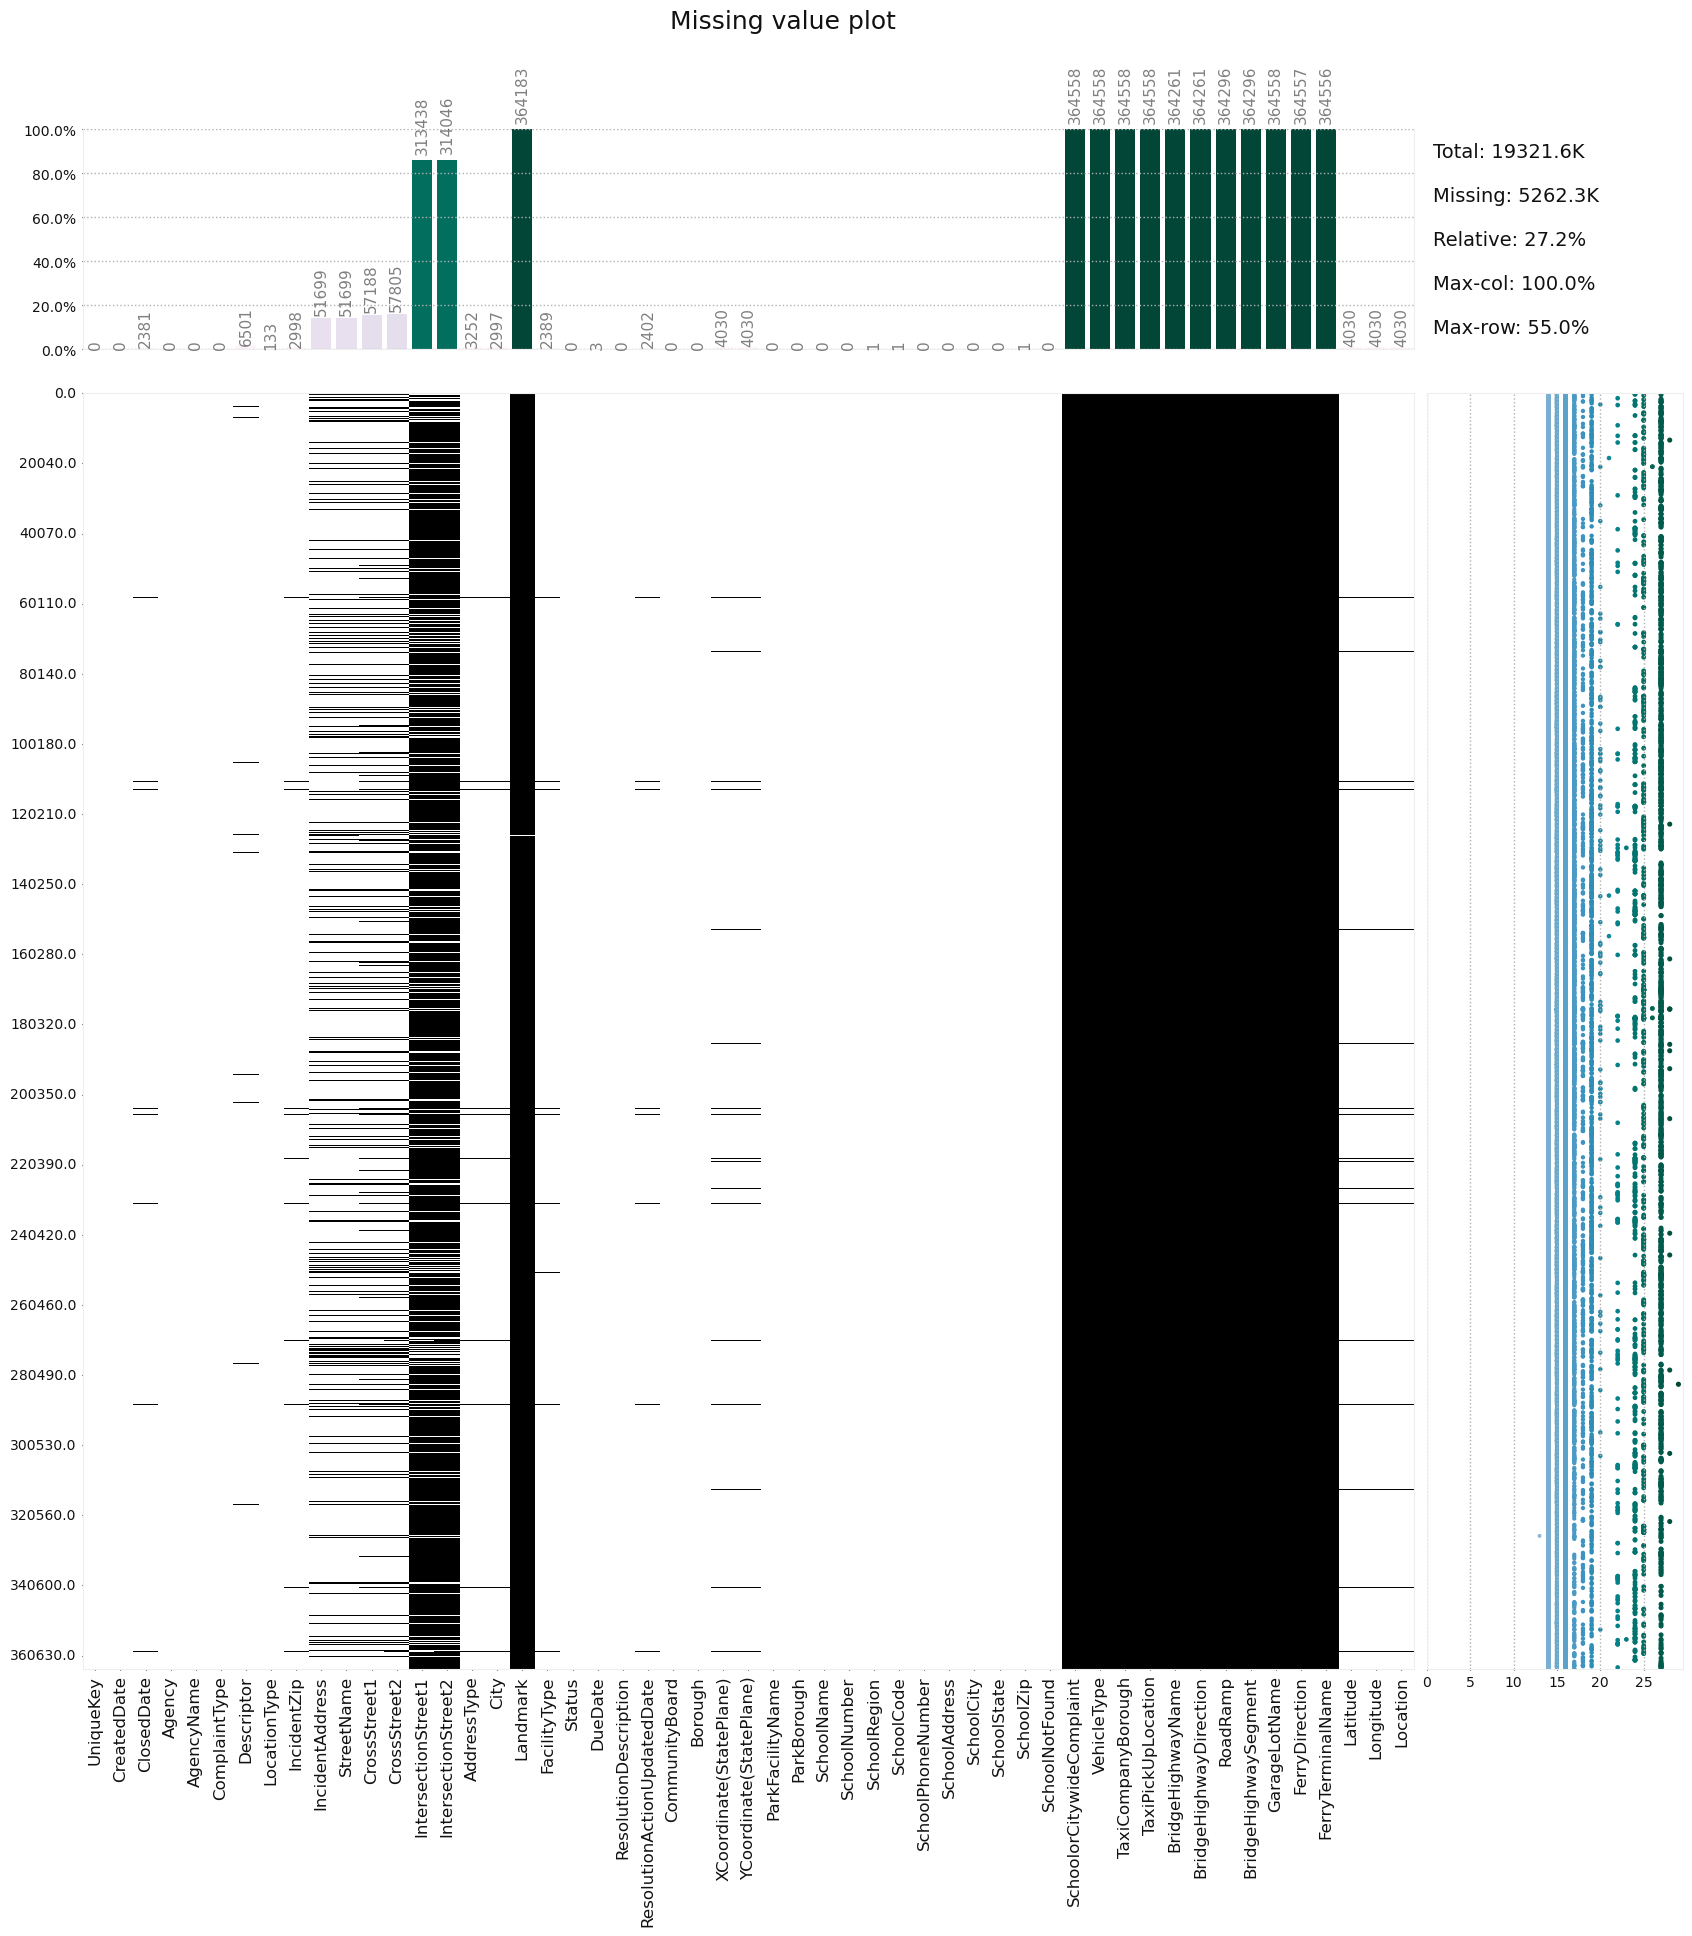

In [10]:
k.missingval_plot(data = data)

#### 2.2 Missing value treatment

#### 2.2.1 Remove the records whose Closed Date values are null

In [11]:
data.dropna(subset =['ClosedDate'],inplace = True)

In [12]:
data.isnull().sum()

UniqueKey                           0
CreatedDate                         0
ClosedDate                          0
Agency                              0
AgencyName                          0
ComplaintType                       0
Descriptor                       6496
LocationType                      130
IncidentZip                       675
IncidentAddress                 51686
StreetName                      51686
CrossStreet1                    55331
CrossStreet2                    55464
IntersectionStreet1            311549
IntersectionStreet2            311673
AddressType                       929
City                              674
Landmark                       361802
FacilityType                       18
Status                              0
DueDate                             1
ResolutionDescription               0
ResolutionActionUpdatedDate        39
CommunityBoard                      0
Borough                             0
XCoordinate(StatePlane)          1707
YCoordinate(

#### 2.3 Analyze the date column, and remove entries that have an incorrect timeline

#### 2.3.1 Calculate the time elapsed in closed and creation date

In [13]:
data['Time_elapse'] = (data['ClosedDate'] - data['CreatedDate'])

In [14]:
data['Time_elapse']

0        0 days 00:55:15
1        0 days 01:26:16
2        0 days 04:51:31
3        0 days 07:45:14
4        0 days 03:27:02
               ...      
364553   0 days 10:18:00
364554   0 days 02:21:00
364555   0 days 00:19:00
364556   0 days 02:41:00
364557   0 days 02:47:00
Name: Time_elapse, Length: 362177, dtype: timedelta64[ns]

#### 2.3.2 Convert the calculated date to seconds to get a better representation

In [15]:
data['second'] =data['Time_elapse'].dt.total_seconds()

In [16]:
data.head(3)

,UniqueKey,CreatedDate,ClosedDate,Agency,AgencyName,ComplaintType,Descriptor,LocationType,IncidentZip,IncidentAddress,...,RoadRamp,BridgeHighwaySegment,GarageLotName,FerryDirection,FerryTerminalName,Latitude,Longitude,Location,Time_elapse,second
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,3315.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,5176.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,17491.0


#### 2.3.3 View the descriptive statistics for the newly created column

In [17]:
data[['Time_elapse', 'second']].describe()

,Time_elapse,second
count,362177,3.621770e+05
mean,0 days 04:11:53.296310919,1.511330e+04
std,0 days 05:51:42.511420261,2.110251e+04
min,0 days 00:01:00,6.000000e+01
25%,0 days 01:15:36,4.536000e+03
50%,0 days 02:40:09,9.609000e+03
75%,0 days 05:14:39,1.887900e+04
max,24 days 16:52:22,2.134342e+06


#### 2.3.4 Check the number of null values in the Complaint_Type and City columns

In [18]:
data[['ComplaintType','City']].isna().sum()

ComplaintType      0
City             674
dtype: int64

#### 2.3.5 Impute the NA value with Unknown City

In [19]:
data['City'].fillna("Unknown City", inplace=True)

#### 2.3.6 Draw a frequency plot for the complaints in each city

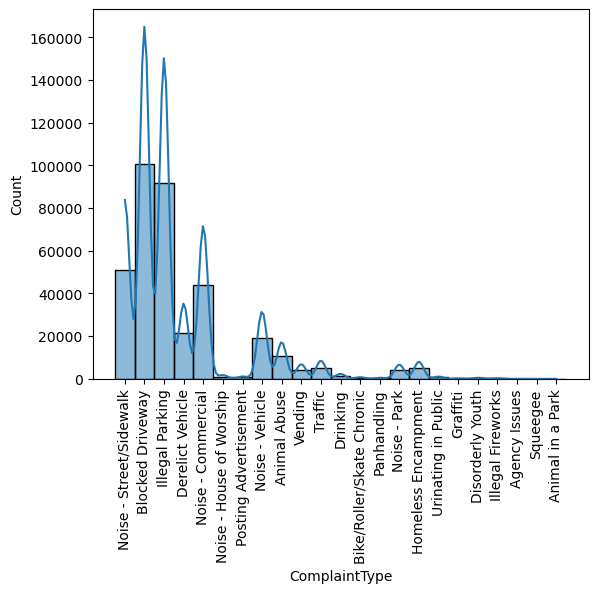

In [20]:
sns.histplot(data = data.City,x =data['ComplaintType'],kde =True)
plt.xticks(rotation = 90)
plt.show()

### 2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

In [21]:
data_bkn = data.query('City == "BROOKLYN"')
data_bkn

,UniqueKey,CreatedDate,ClosedDate,Agency,AgencyName,ComplaintType,Descriptor,LocationType,IncidentZip,IncidentAddress,...,RoadRamp,BridgeHighwaySegment,GarageLotName,FerryDirection,FerryTerminalName,Latitude,Longitude,Location,Time_elapse,second
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",0 days 01:53:30,6810.0
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",0 days 01:23:02,4982.0
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,...,NaN,NaN,NaN,NaN,NaN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)",0 days 08:30:02,30602.0
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,NaN,NaN,NaN,NaN,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",0 days 00:51:08,3068.0
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",0 days 02:56:01,10561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364539,29608505,2015-01-01 00:23:00,2015-01-01 02:58:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11201.0,229 DUFFIELD STREET,...,NaN,NaN,NaN,NaN,NaN,40.691248,-73.984375,"(40.69124772858873, -73.98437529459297)",0 days 02:35:00,9300.0
364541,29612697,2015-01-01 00:19:00,2015-01-01 02:41:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11211.0,27 HOPE STREET,...,NaN,NaN,NaN,NaN,NaN,40.713613,-73.956966,"(40.71361332917013, -73.95696623841229)",0 days 02:22:00,8520.0
364544,29613295,2015-01-01 00:17:00,2015-01-01 03:24:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11217.0,242 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.680352,-73.974766,"(40.68035202521423, -73.97476587888686)",0 days 03:07:00,11220.0
364545,29613456,2015-01-01 00:17:00,2015-01-01 00:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11237.0,1373 DECATUR STREET,...,NaN,NaN,NaN,NaN,NaN,40.692384,-73.904011,"(40.692383519190834, -73.90401080101479)",0 days 00:34:00,2040.0


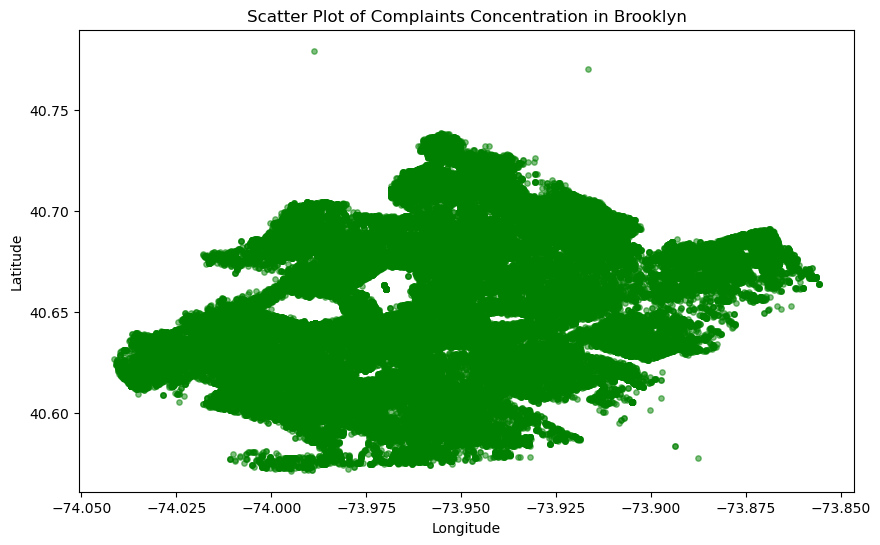

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(data_bkn['Longitude'], data_bkn['Latitude'], alpha=0.5, s=15, color='green')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Complaints Concentration in Brooklyn')
plt.show()




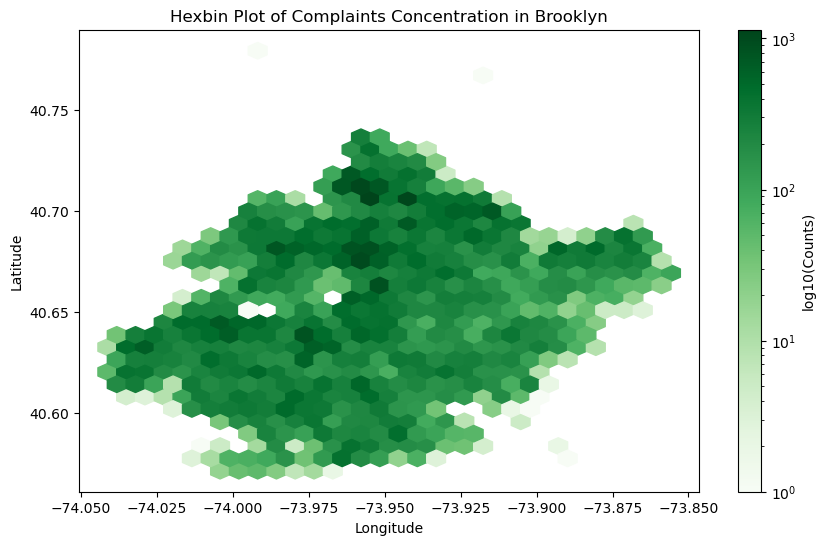

In [23]:
plt.figure(figsize=(10, 6))
plt.hexbin(data_bkn['Longitude'], data_bkn['Latitude'], gridsize=30, cmap='Greens', bins='log', mincnt=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Complaints Concentration in Brooklyn')
plt.colorbar(label='log10(Counts)')
plt.show()

### 3. Find major types of complaints:

In [24]:
data['ComplaintType'].value_counts()

Blocked Driveway             100624
Illegal Parking               91716
Noise - Street/Sidewalk       51139
Noise - Commercial            43751
Derelict Vehicle              21518
Noise - Vehicle               19301
Animal Abuse                  10530
Traffic                        5196
Homeless Encampment            4879
Vending                        4185
Noise - Park                   4089
Drinking                       1404
Noise - House of Worship       1068
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       475
Panhandling                     325
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Animal in a Park                  1
Name: ComplaintType, dtype: int64

#### 3.1 Plot a bar graph to show the types of complaints

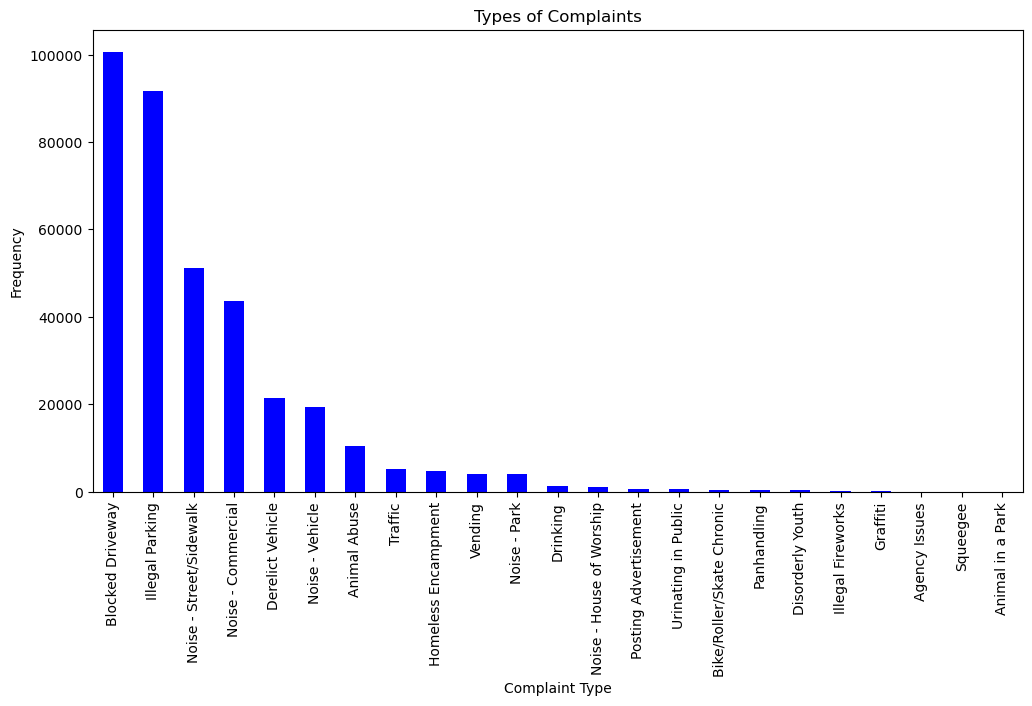

In [25]:
complaints_by_type = data['ComplaintType'].value_counts()

plt.figure(figsize=(12, 6))
complaints_by_type.plot(kind='bar', color='blue')
plt.xlabel('Complaint Type')
plt.ylabel('Frequency')
plt.title('Types of Complaints')
plt.xticks(rotation=90)
plt.show()


#### 3.2 Check the frequency of various types of complaints for NewYork City

In [26]:
newyork = data.query('City == "NEW YORK"')
newyork["ComplaintType"].value_counts()

Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: ComplaintType, dtype: int64

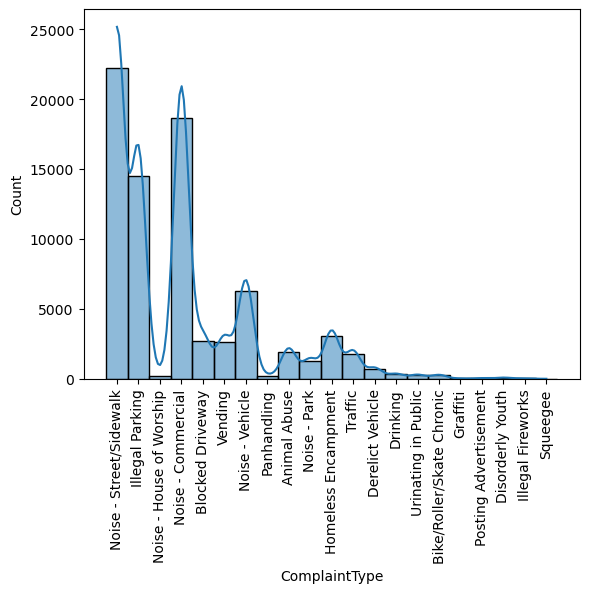

In [27]:
sns.histplot(data = newyork,x =newyork['ComplaintType'],kde =True)
plt.xticks(rotation = 90)
plt.show()

#### 3.3 Find the top 10 complaint types

In [28]:
complaint = data.ComplaintType.value_counts()

In [29]:
complaint.nlargest(10)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: ComplaintType, dtype: int64

#### 3.4 Display the various types of complaints in each city

In [30]:
data.loc[:,['ComplaintType','City']]

,ComplaintType,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
...,...,...
364553,Illegal Parking,WOODHAVEN
364554,Noise - Vehicle,BRONX
364555,Noise - Street/Sidewalk,NEW YORK
364556,Blocked Driveway,BRONX


#### 3.5 Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

In [31]:
df_new = data.pivot_table(index='ComplaintType', columns='City', aggfunc='size', fill_value=0)
print(df_new)

City                       ARVERNE  ASTORIA  Astoria  BAYSIDE  BELLEROSE  \
ComplaintType                                                              
Agency Issues                    0        0        0        0          0   
Animal Abuse                    46      170        0       53         15   
Animal in a Park                 0        0        0        0          0   
Bike/Roller/Skate Chronic        0       16        0        0          1   
Blocked Driveway                50     3436      159      514        138   
Derelict Vehicle                32      426       14      231        120   
Disorderly Youth                 2        5        0        2          2   
Drinking                         1       43        0        1          1   
Graffiti                         1        4        0        3          0   
Homeless Encampment              4       32        0        2          1   
Illegal Fireworks                0        4        0        0          1   
Illegal Park

### 4. Visualize the major types of complaints in each city

#### 4.1 Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints

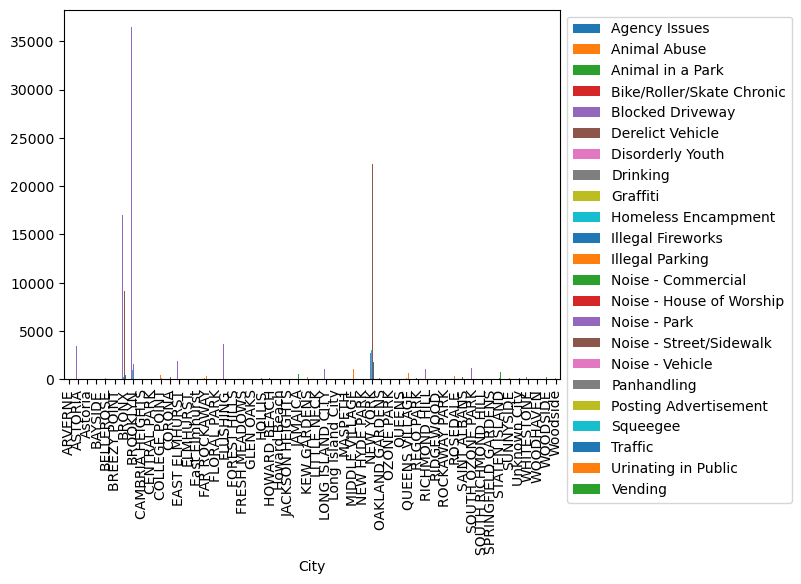

In [32]:
complaints_by_city_and_type = data.groupby(['City', 'ComplaintType']).size().unstack(fill_value=0)
complaints_by_city_and_type.plot.bar()
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

#### 4.2 Sort the complaints types based on the average Request_Closing_Time grouping them for different locations

In [33]:
data['Request_Closing_Time'] =data['second']/3600 
complaintstype_location = data.groupby(['ComplaintType','City'])['Request_Closing_Time'].mean().reset_index()
sorted_complaints = complaintstype_location.sort_values(by='Request_Closing_Time')
print(sorted_complaints)

                 ComplaintType                 City  Request_Closing_Time
213                   Drinking              ARVERNE              0.238611
666      Posting Advertisement            RIDGEWOOD              0.248611
54   Bike/Roller/Skate Chronic        EAST ELMHURST              0.252222
338          Illegal Fireworks           OZONE PARK              0.316667
739        Urinating in Public               QUEENS              0.350000
..                         ...                  ...                   ...
307        Homeless Encampment      OAKLAND GARDENS             28.650000
70   Bike/Roller/Skate Chronic  SOUTH RICHMOND HILL             30.910278
286        Homeless Encampment            BELLEROSE             39.133333
273                   Graffiti       QUEENS VILLAGE             53.333333
49            Animal in a Park               QUEENS            336.834722

[792 rows x 3 columns]


### 5.See whether the average response time across different complaints types is similar (overall)

In [34]:
overall_average_response_time = data['Request_Closing_Time'].mean()
average_response_time_complaints  = data.groupby('ComplaintType')['Request_Closing_Time'].mean()
print('Overall Average Response Time :{:.2f} hours'.format(overall_average_response_time))
print('\n')
print("Average Response Time by Complaint Type:")
print('----------------------------------------')
print(average_response_time_complaints)

Overall Average Response Time :4.20 hours


Average Response Time by Complaint Type:
----------------------------------------
ComplaintType
Agency Issues                  5.081979
Animal Abuse                   5.009046
Animal in a Park             336.834722
Bike/Roller/Skate Chronic      3.645481
Blocked Driveway               4.509008
Derelict Vehicle               7.044336
Disorderly Youth               3.434251
Drinking                       3.839000
Graffiti                       6.465421
Homeless Encampment            4.292036
Illegal Fireworks              2.809041
Illegal Parking                4.347372
Noise - Commercial             3.079378
Noise - House of Worship       3.164229
Noise - Park                   3.396148
Noise - Street/Sidewalk        3.397580
Noise - Vehicle                3.489407
Panhandling                    4.403651
Posting Advertisement          2.023640
Squeegee                       4.045625
Traffic                        3.419163
Urinating in Public 

#### 5.1 Visualize the average of Request_Closing_Time

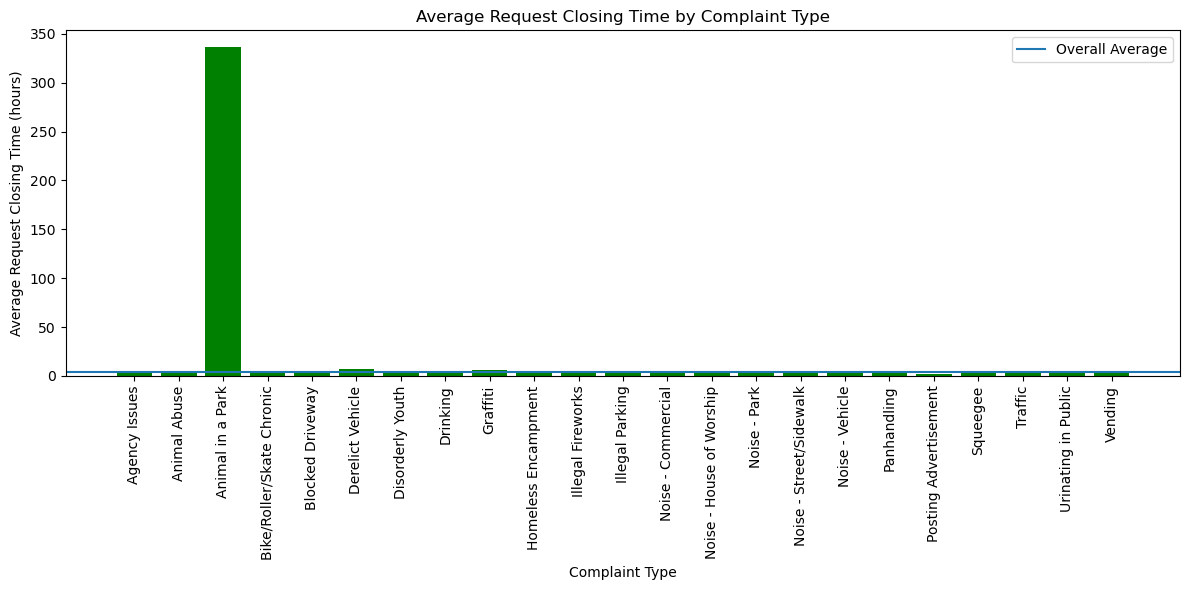

In [35]:
overall_average_response_time = data['Request_Closing_Time'].mean()
average_response_time_by_complaint = data.groupby('ComplaintType')['Request_Closing_Time'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(average_response_time_by_complaint['ComplaintType'], average_response_time_by_complaint['Request_Closing_Time'], color='green')
plt.axhline(y=overall_average_response_time, label='Overall Average')
plt.xlabel('Complaint Type')
plt.ylabel('Average Request Closing Time (hours)')
plt.title('Average Request Closing Time by Complaint Type')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


##### <i><p style="text-align:right;">- R R
    